<a href="https://colab.research.google.com/github/SrikarNagavelli/CODINGSAMURAI/blob/main/Sentiment_Analysis_on_Social_Media_Tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**🔹 Step 1: Import Libraries**

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**🔹 Step 2: Load the Dataset**

In [18]:
import pandas as pd

# Load dataset (assuming 'Tweets.csv' is already uploaded)
df = pd.read_csv("Tweets.csv")
df = df[['text', 'airline_sentiment']]
df.head()



,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


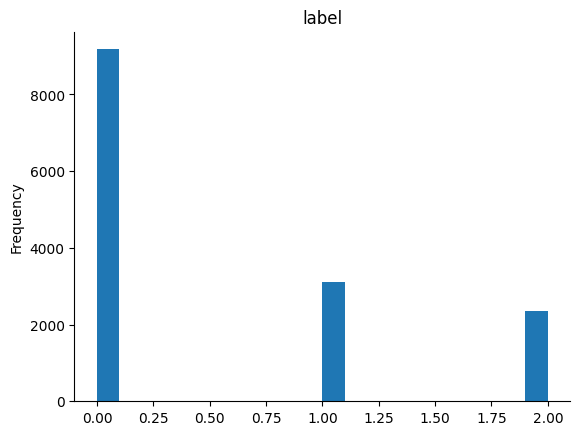

In [29]:
# @title label

from matplotlib import pyplot as plt
df['label'].plot(kind='hist', bins=20, title='label')
plt.gca().spines[['top', 'right',]].set_visible(False)

**🔹 Step 3: Data Cleaning / Preprocessing**

In [19]:
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()  # lowercase
    text = re.sub(r'http\S+', '', text)  # remove URLs
    text = re.sub(r'@\w+', '', text)  # remove mentions
    text = re.sub(r'#\w+', '', text)  # remove hashtags
    text = re.sub(r'[^\w\s]', '', text)  # remove punctuation
    text = re.sub(r'\d+', '', text)  # remove digits
    text = ' '.join([word for word in text.split() if word not in stop_words])  # remove stopwords
    return text

df['clean_text'] = df['text'].apply(clean_text)
df.head()

,text,airline_sentiment,clean_text
0,@VirginAmerica What @dhepburn said.,neutral,said
1,@VirginAmerica plus you've added commercials t...,positive,plus youve added commercials experience tacky
2,@VirginAmerica I didn't today... Must mean I n...,neutral,didnt today must mean need take another trip
3,@VirginAmerica it's really aggressive to blast...,negative,really aggressive blast obnoxious entertainmen...
4,@VirginAmerica and it's a really big bad thing...,negative,really big bad thing


<ipython-input-32-4231472921>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='label', y='airline_sentiment', inner='box', palette='Dark2')


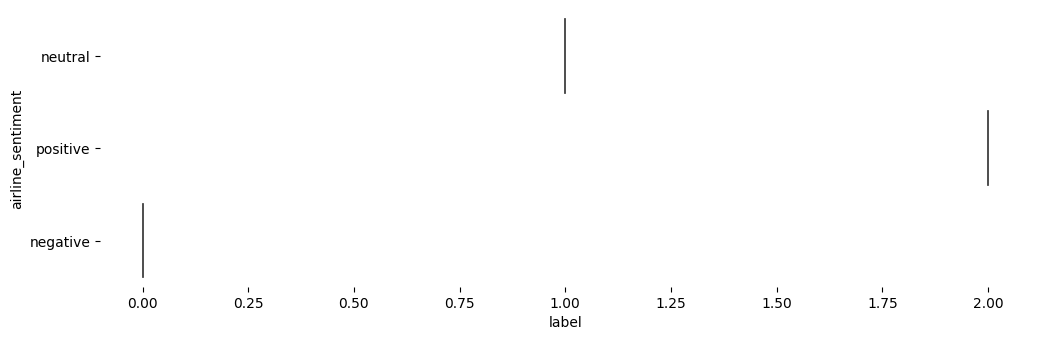

In [32]:
# @title airline_sentiment vs label

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['airline_sentiment'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='label', y='airline_sentiment', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

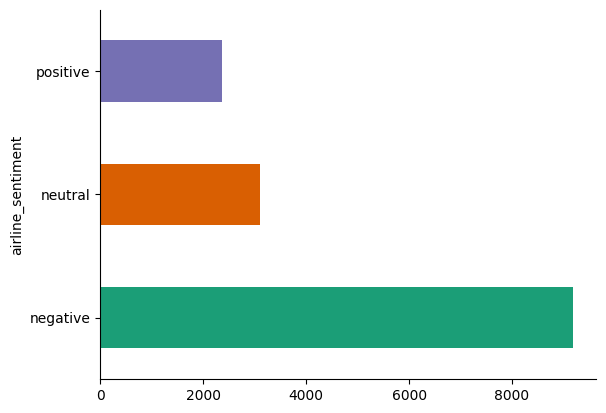

In [31]:
# @title airline_sentiment

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('airline_sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

**🔹 Step 4: Encode Sentiment & Split Data**

In [20]:
# Encode labels
df['label'] = df['airline_sentiment'].map({'negative': 0, 'neutral': 1, 'positive': 2})

# Split data
X = df['clean_text']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**🔹 TF-IDF Vectorization**

In [21]:
tfidf = TfidfVectorizer(max_features=3000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

**🔹 Train the Model**

In [22]:
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

MultinomialNB()

**🔹 Evaluate the Model**

Accuracy: 0.7489754098360656

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.98      0.84      1889
           1       0.70      0.25      0.37       580
           2       0.89      0.43      0.58       459

    accuracy                           0.75      2928
   macro avg       0.78      0.55      0.60      2928
weighted avg       0.76      0.75      0.71      2928



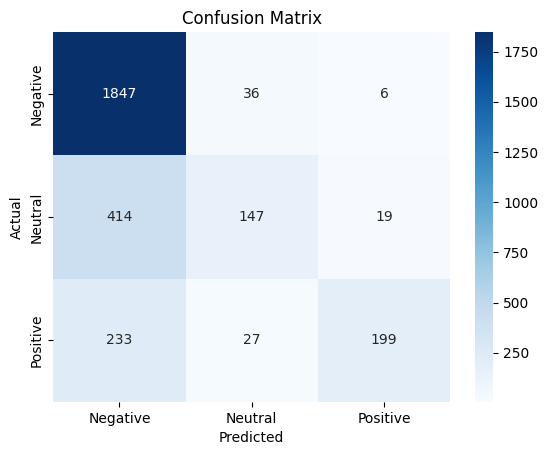

In [23]:
y_pred = model.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

**✅ Word Cloud for Each Sentiment**

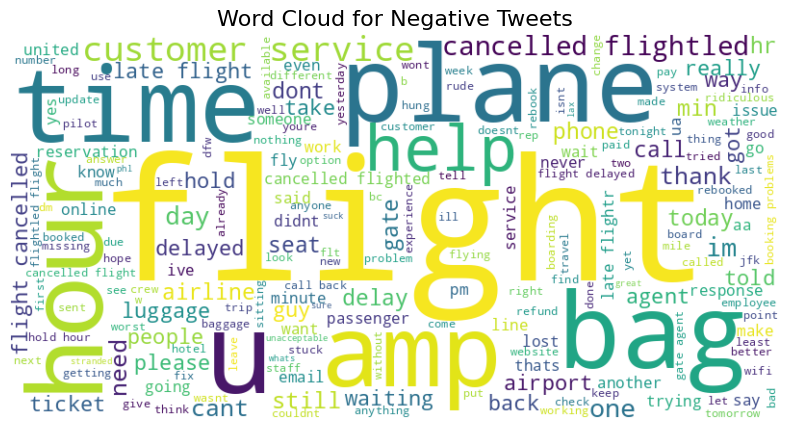

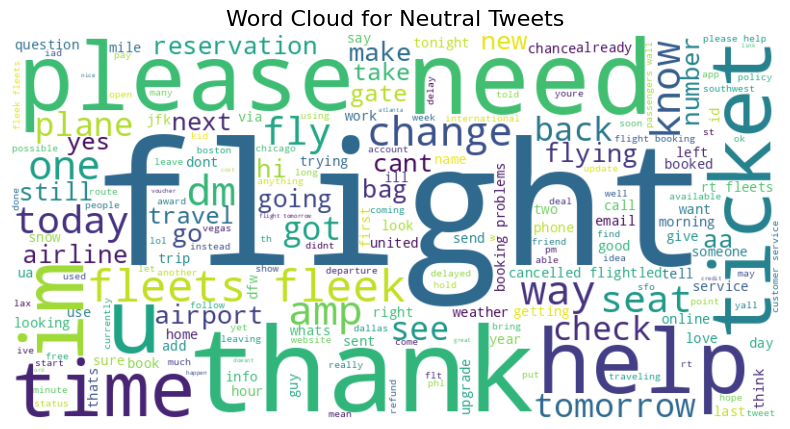

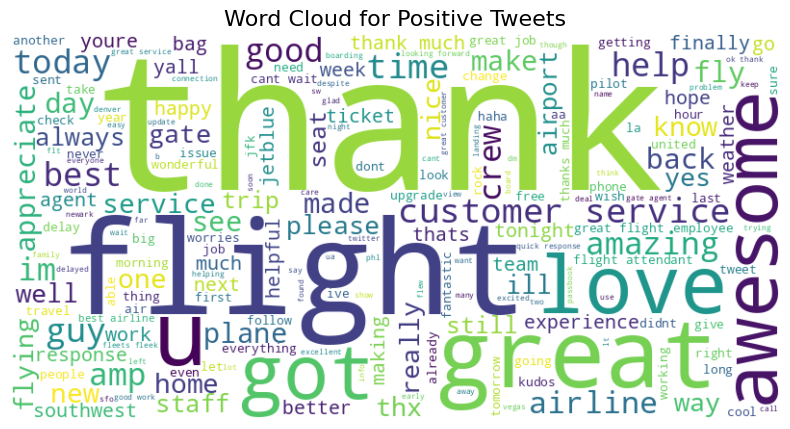

In [24]:
from wordcloud import WordCloud

# Plot word clouds for each sentiment
for label, sentiment in zip([0, 1, 2], ['Negative', 'Neutral', 'Positive']):
    text = " ".join(df[df['label'] == label]['clean_text'])
    wc = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.title(f'Word Cloud for {sentiment} Tweets', fontsize=16)
    plt.axis('off')
    plt.show()


**✅ Visualize TF-IDF Keywords by Sentiment**

<ipython-input-25-588565532>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_words.values, y=top_words.index, palette='viridis')


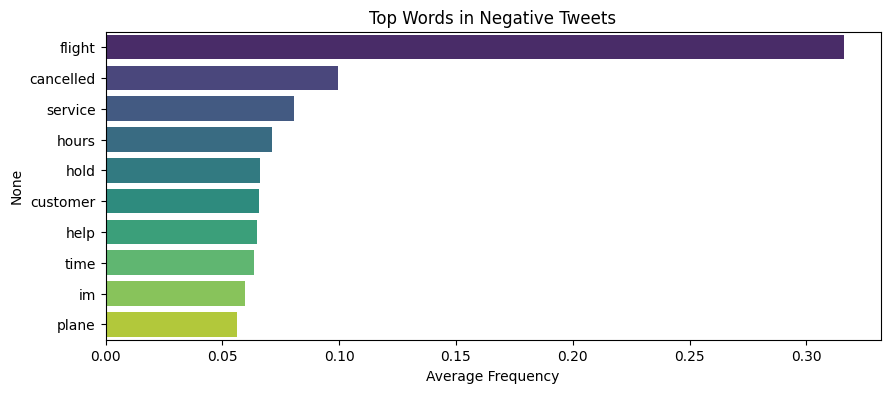

<ipython-input-25-588565532>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_words.values, y=top_words.index, palette='viridis')


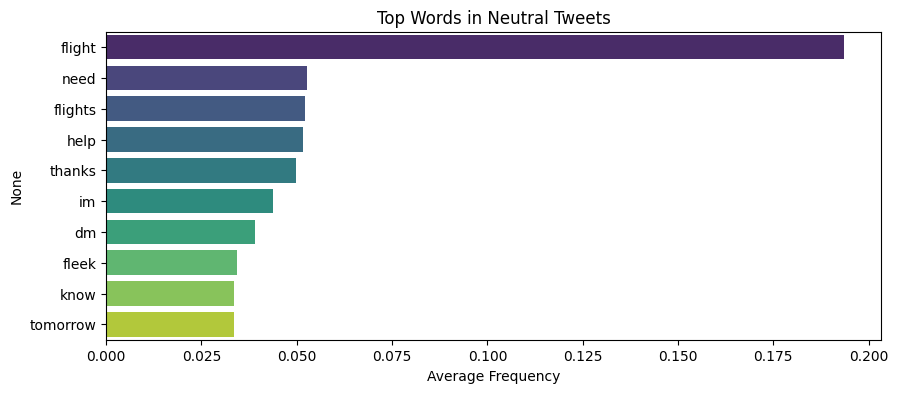

<ipython-input-25-588565532>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_words.values, y=top_words.index, palette='viridis')


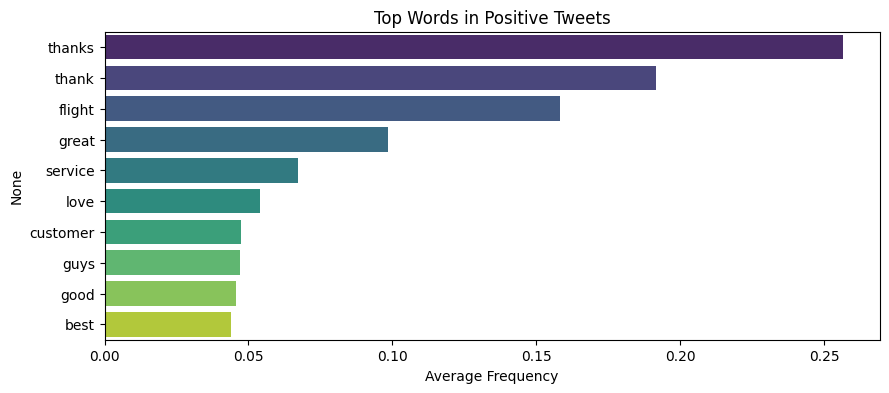

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

# Use CountVectorizer to find top words
cv = CountVectorizer(stop_words='english', max_features=1000)
X_counts = cv.fit_transform(df['clean_text'])

# Convert to DataFrame
word_freq_df = pd.DataFrame(X_counts.toarray(), columns=cv.get_feature_names_out())
word_freq_df['label'] = df['label']

# Mean frequency by label
label_names = ['Negative', 'Neutral', 'Positive']
for i in range(3):
    top_words = word_freq_df[word_freq_df['label'] == i].drop('label', axis=1).mean().sort_values(ascending=False)[:10]
    plt.figure(figsize=(10, 4))
    sns.barplot(x=top_words.values, y=top_words.index, palette='viridis')
    plt.title(f"Top Words in {label_names[i]} Tweets")
    plt.xlabel("Average Frequency")
    plt.show()


**✅ Real Tweet Prediction**

In [26]:
def predict_sentiment(tweet):
    cleaned = clean_text(tweet)
    vectorized = tfidf.transform([cleaned])
    pred = model.predict(vectorized)[0]
    return ['Negative', 'Neutral', 'Positive'][pred]

# Test
tweet = "@VirginAmerica I loved the service and the crew!"
print("Tweet:", tweet)
print("Predicted Sentiment:", predict_sentiment(tweet))


Tweet: @VirginAmerica I loved the service and the crew!
Predicted Sentiment: Positive


In [34]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_tfidf, y_train)
lr_preds = lr_model.predict(X_test_tfidf)

print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_preds))


Logistic Regression Accuracy: 0.79474043715847
